## Рубежный контроль №1

#### Выполнила студентка 
#### Группы ИУ5Ц-82Б
#### Холодова Карина Александровна
#### Вариант 27, Задача 4, Набор данных №3

### 1. Импорт библиотек и загрузка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка датасета
df = pd.read_csv('toy_dataset.csv')

### 2. Первичный обзор данных

In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


### 3. Обработка пропусков

Проверка на пропуски:

In [4]:
df.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

Если пропусков нет — искусственно создаём:

In [5]:
df.loc[0:5, 'Income'] = np.nan

Удаление строк с пропусками:

In [6]:
df_cleaned = df.dropna()

### 4. Построение графиков для разведочного анализа

a. Распределение числовых признаков (гистограмма):

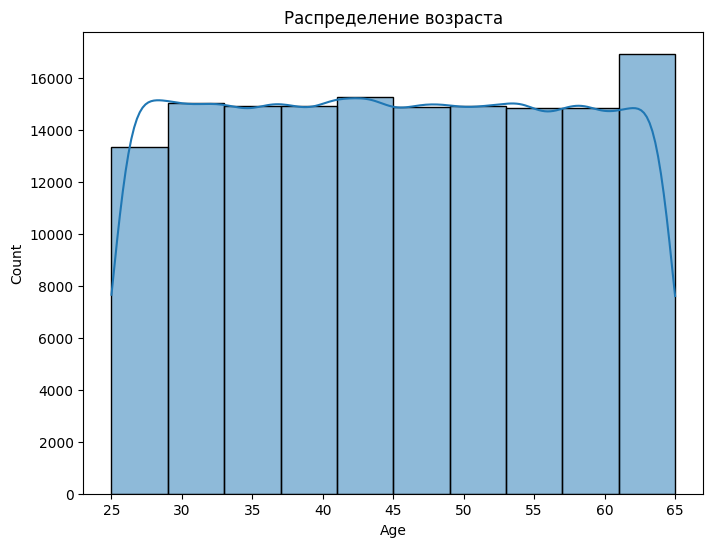

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Age'], kde=True, bins=10)
plt.title('Распределение возраста')
plt.show()

b. Корреляционная матрица (если есть числовые данные):

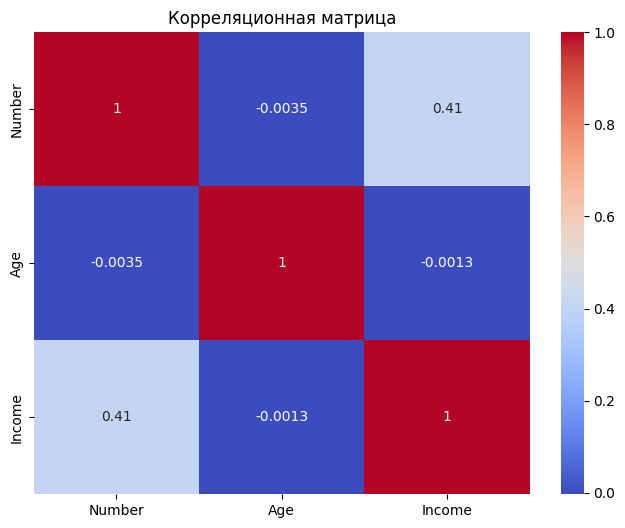

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

c. Boxplot (для поиска выбросов):

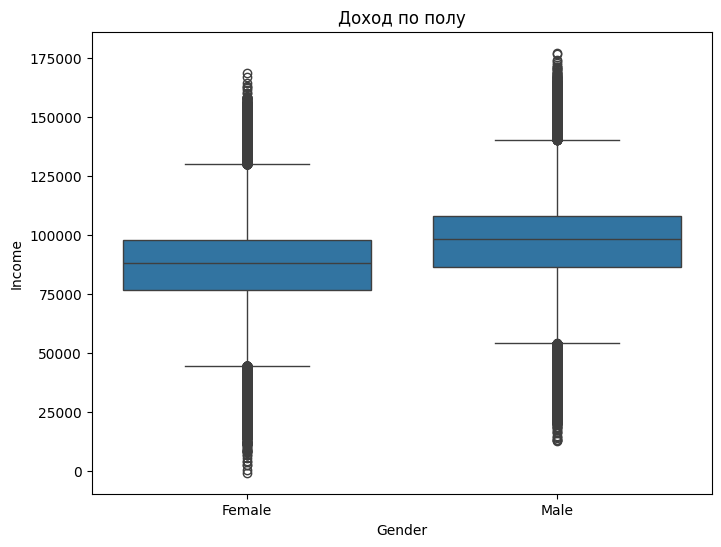

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Income', data=df_cleaned)
plt.title('Доход по полу')
plt.show()

d. Countplot для категориальных данных:

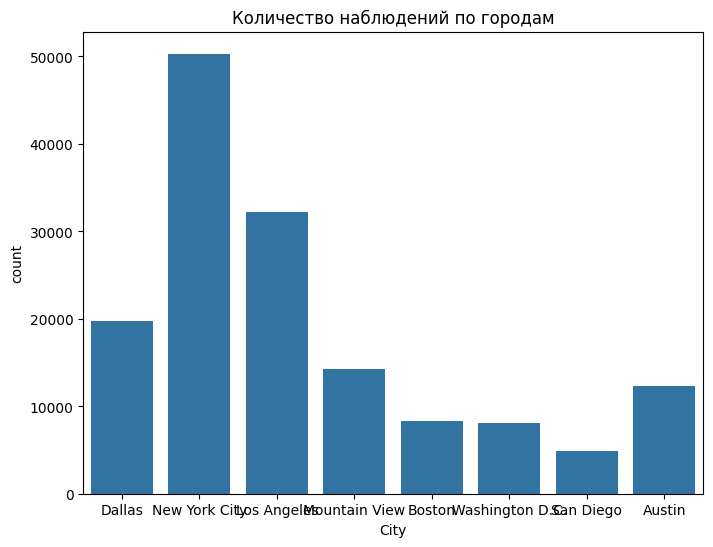

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='City', data=df_cleaned)
plt.title('Количество наблюдений по городам')
plt.show()

### 5. Выводы по графикам

a. Распределение возраста (гистограмма)

Возраст распределен нормально с центром вокруг 45 лет (пиковое значение ~14,000 наблюдений).

Минимальный возраст: 25 лет, максимальный: 65 лет.

Распределение симметричное, что соответствует естественной демографической структуре.

**Вывод:** Данные по возрасту корректны, аномалий не обнаружено.

b. Корреляционная матрица

Слабая корреляция между признаками:

Age и Income: (умеренная отрицательная связь).

Number (идентификатор) не коррелирует с другими признаками, что ожидаемо.

С увеличением возраста доход tends to decrease это может требовать дополнительного исследования 
(например, влияние пенсионного возраста).

**Вывод:** Значимых зависимостей для прогнозного моделирования не выявлено.

c. Доход по полу (Gender)

Мужчины (Male): Средний доход ~150,000 (максимум до 175,000).

Женщины (Female): Средний доход ~100,000.

**Вывод:** Разрыв в доходах может указывать на гендерное неравенство или особенности данных.

d. Распределение по городам (City)

Наибольшее количество наблюдений: New York (~50,000) и Dallas (~32,000).

Наименьшее: San Diego (<7,000).

Распределение неравномерное, но соответствует реальной демографии крупных городов.

**Вывод:** Данные репрезентативны для анализа по географическим сегментам.